# Import important libraries

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score,make_scorer
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 23.1 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('framingham_heart_study.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4240, 16)

#EDA

In [ ]:
 df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


From Count I can check that there is missing values on the eductation, cigsPerDay, BPMeds, totChol, BMI, heartRate, and glucose have missing data in it. so let's check the Null values

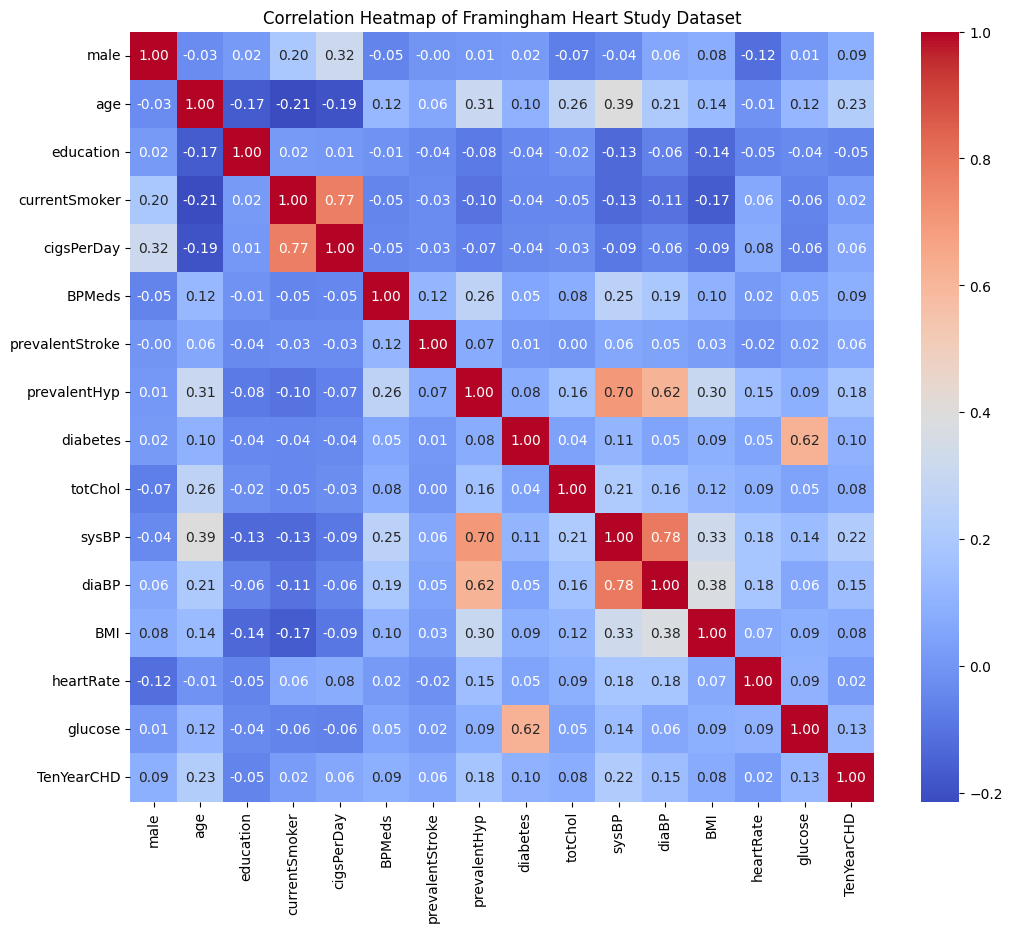

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Framingham Heart Study Dataset')
plt.show()

age, sysBP, diaBP, glucose, and totChol have a positive correlation with the target (TenYearCHD), and there is a risk of multicolinearity in (sysBp,diaBP) and (cigsPerDay,currentSmoker)

<Axes: xlabel='sysBP', ylabel='diaBP'>

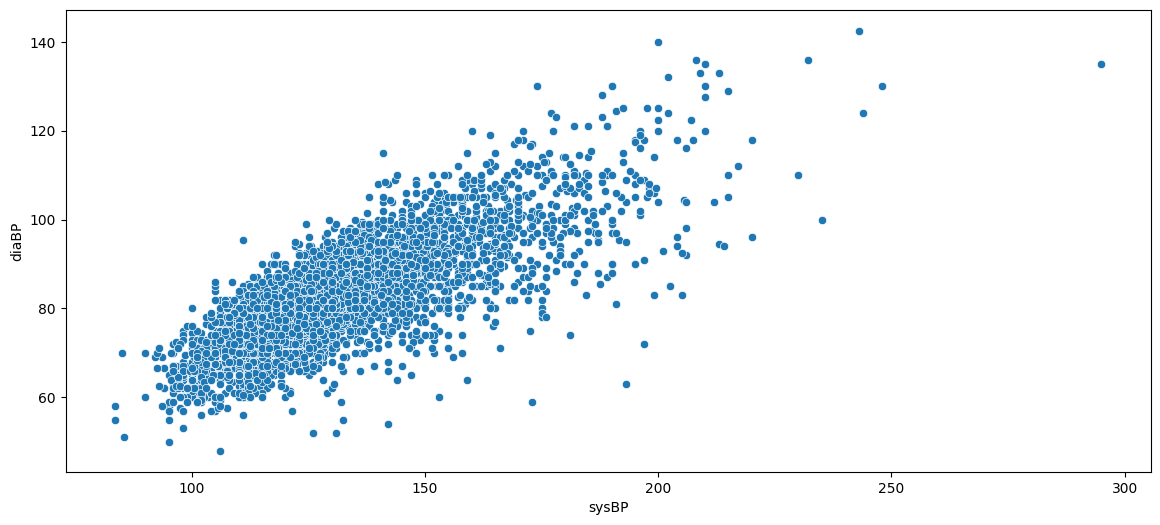

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.scatterplot(x=df['sysBP'], y=df['diaBP'])


That's indicate a multicolinearity for these features

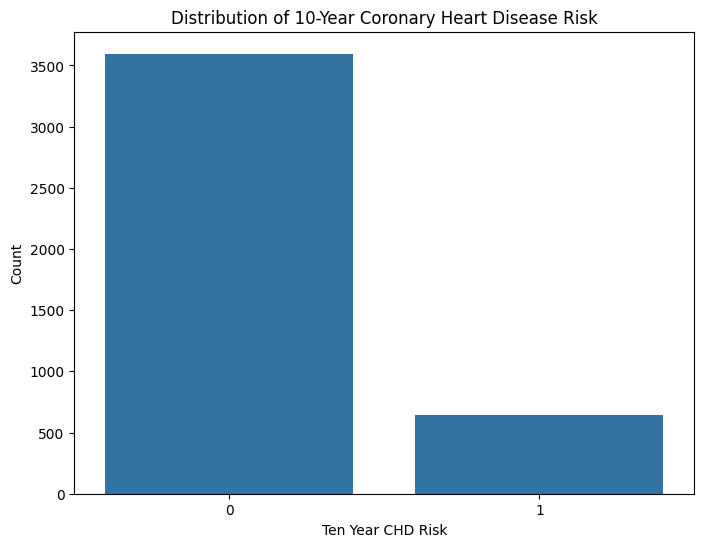

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['TenYearCHD'])
plt.title('Distribution of 10-Year Coronary Heart Disease Risk')
plt.xlabel('Ten Year CHD Risk')
plt.ylabel('Count')
plt.show()


The Target data is imbalanced we should consider this in prepreocessing

#PreProcessing

## Handling Missing Data

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


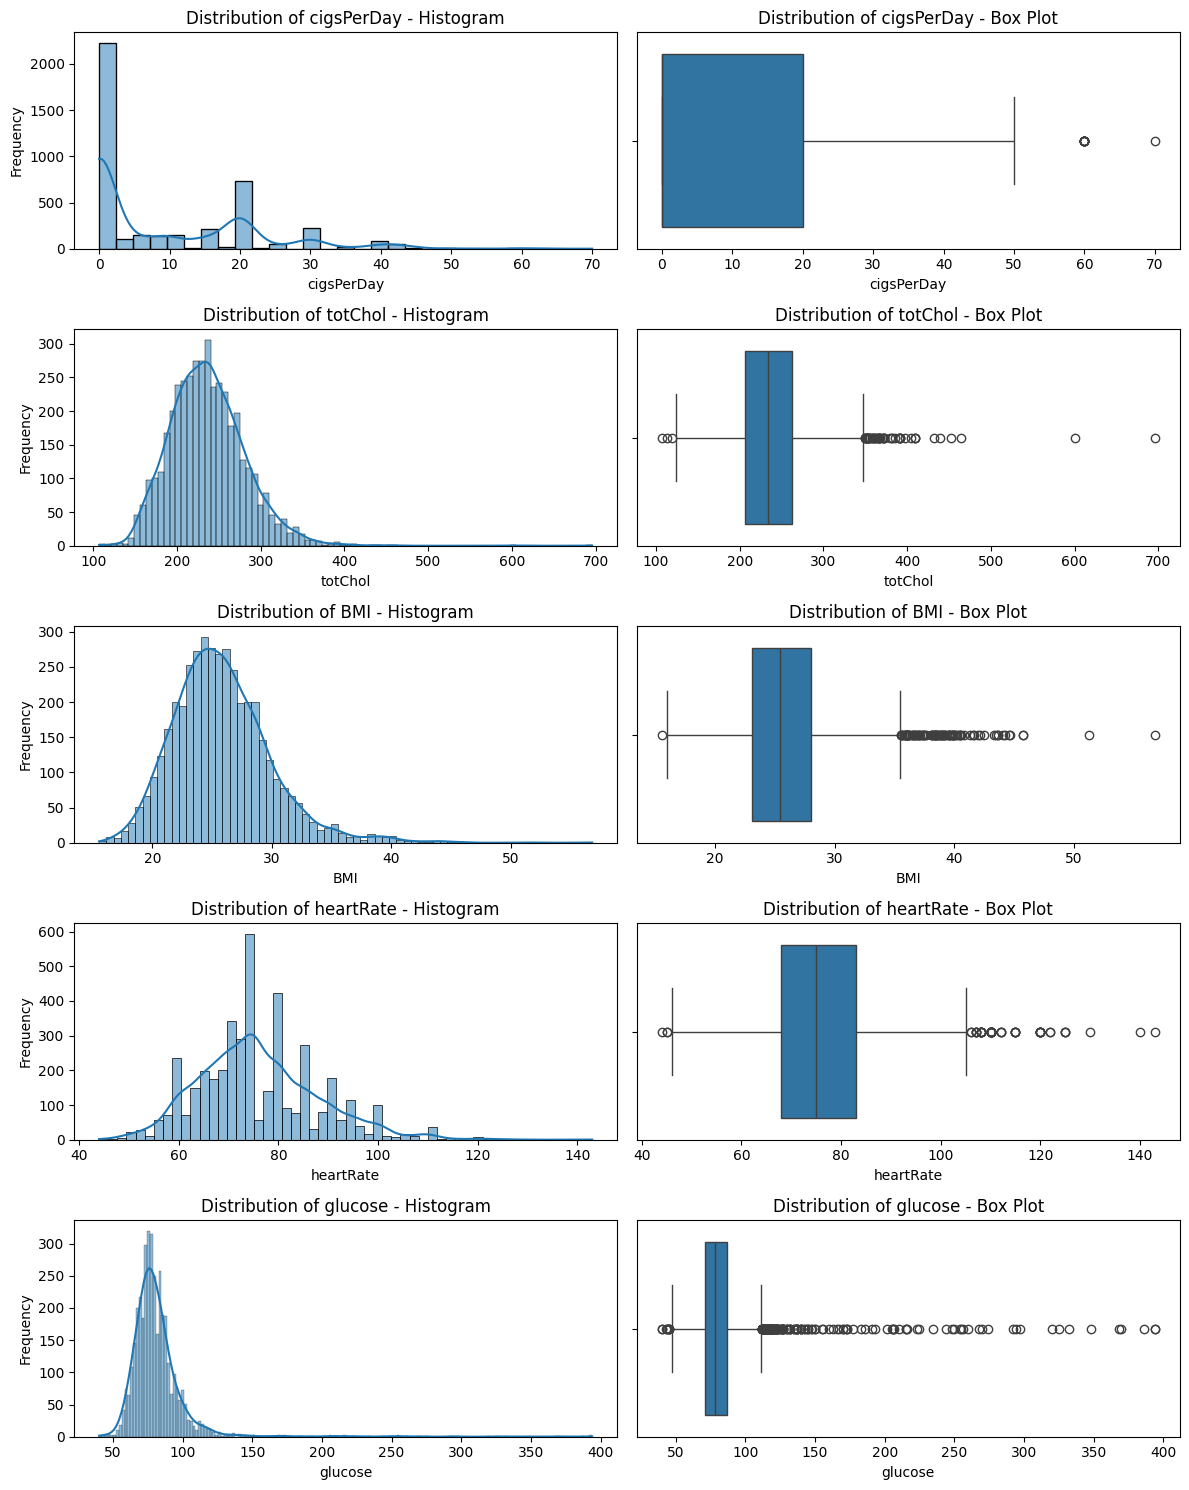

In [ ]:
variables_to_plot = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']
fig, axes = plt.subplots(len(variables_to_plot), 2, figsize=(12, 15))

for i, var in enumerate(variables_to_plot):
    sns.histplot(df[var], kde=True, ax=axes[i][0])
    axes[i][0].set_title(f'Distribution of {var} - Histogram')
    axes[i][0].set_xlabel(var)
    axes[i][0].set_ylabel('Frequency')

    sns.boxplot(x=df[var], ax=axes[i][1])
    axes[i][1].set_title(f'Distribution of {var} - Box Plot')
    axes[i][1].set_xlabel(var)

plt.tight_layout()
plt.show()


In [ ]:
for var in ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']:
    median_value = df[var].median()
    df[var].fillna(median_value, inplace=True)

<ipython-input-10-38edea51b32e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[var].fillna(median_value, inplace=True)


In [ ]:
for var in ['education', 'BPMeds']:
    mode_value = df[var].mode()[0]
    df[var].fillna(mode_value, inplace=True)

<ipython-input-11-4516ddf7e40c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[var].fillna(mode_value, inplace=True)


In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


## Handling imbalanced Target

In [ ]:
df_majority = df[df.TenYearCHD == 0]
df_minority = df[df.TenYearCHD == 1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print(df_upsampled.TenYearCHD.value_counts())

TenYearCHD
0    3596
1    3596
Name: count, dtype: int64


# Machine Learning Models

## Split the data

In [ ]:
X = df_upsampled.drop('TenYearCHD', axis=1)
y = df_upsampled['TenYearCHD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Decision Tree

### Parameters

1- min_samples_split:  The minimum number of samples required to split an internal node.

2- min_samples_leaf : The minimum number of samples required to be at a leaf node.


3- criterion: he function to measure the quality of a split.

### Implementation

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
param_grid = {
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [2, 3, 5],
    'criterion': ['gini', 'entropy']
}

In [ ]:
scoring = {
    'precision':'precision',
    'recall': 'recall',
    'f1':'f1',
    'accuracy':'accuracy'
}

In [ ]:
grid_search = GridSearchCV(dt, param_grid, cv=10, scoring=scoring,refit='recall', verbose=1,return_train_score=True)

In [ ]:
det_model = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [ ]:
results_det = det_model.cv_results_
results_det_df = pd.DataFrame(results_det)

columns_of_interest = ['params', 'mean_train_accuracy', 'mean_test_accuracy','mean_train_precision', 'mean_train_recall', 'mean_train_f1','mean_test_precision', 'mean_test_recall', 'mean_test_f1']
results_df_det_col = results_det_df[columns_of_interest]

results_df_det_col

,params,mean_train_accuracy,mean_test_accuracy,mean_train_precision,mean_train_recall,mean_train_f1,mean_test_precision,mean_test_recall,mean_test_f1
0,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.983970,0.877460,0.978543,0.989819,0.984147,0.831540,0.948824,0.886251
1,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.981440,0.871899,0.978510,0.984709,0.981597,0.830636,0.936381,0.880284
2,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.957568,0.852258,0.950507,0.965922,0.958138,0.815437,0.913557,0.861516
3,"{'criterion': 'gini', 'min_samples_leaf': 3, '...",0.965158,0.856601,0.952727,0.979292,0.965822,0.813009,0.928769,0.866935
4,"{'criterion': 'gini', 'min_samples_leaf': 3, '...",0.965158,0.856601,0.952727,0.979292,0.965822,0.813009,0.928769,0.866935
5,"{'criterion': 'gini', 'min_samples_leaf': 3, '...",0.945787,0.845998,0.935985,0.957661,0.946689,0.811102,0.904569,0.855153
6,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.925681,0.820440,0.917817,0.935992,0.926804,0.791020,0.874477,0.830219
7,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.925681,0.820440,0.917817,0.935992,0.926804,0.791020,0.874477,0.830219
8,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.925681,0.820440,0.917817,0.935992,0.926804,0.791020,0.874477,0.830219
9,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.987427,0.880064,0.983613,0.991509,0.987545,0.829687,0.958506,0.889384


In [ ]:
 results_df_training_det_col =results_det_df[['params','mean_train_accuracy','mean_train_precision','mean_train_recall','mean_train_f1']]

 results_df_training_det_col

,params,mean_train_accuracy,mean_train_precision,mean_train_recall,mean_train_f1
0,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.983970,0.978543,0.989819,0.984147
1,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.981440,0.978510,0.984709,0.981597
2,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.957568,0.950507,0.965922,0.958138
3,"{'criterion': 'gini', 'min_samples_leaf': 3, '...",0.965158,0.952727,0.979292,0.965822
4,"{'criterion': 'gini', 'min_samples_leaf': 3, '...",0.965158,0.952727,0.979292,0.965822
5,"{'criterion': 'gini', 'min_samples_leaf': 3, '...",0.945787,0.935985,0.957661,0.946689
6,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.925681,0.917817,0.935992,0.926804
7,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.925681,0.917817,0.935992,0.926804
8,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.925681,0.917817,0.935992,0.926804
9,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.987427,0.983613,0.991509,0.987545


In [ ]:
 results_df_testing_det_col =results_det_df[['params','mean_test_accuracy','mean_test_precision','mean_test_recall','mean_test_f1']]

 results_df_testing_det_col

,params,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.877460,0.831540,0.948824,0.886251
1,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.871899,0.830636,0.936381,0.880284
2,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.852258,0.815437,0.913557,0.861516
3,"{'criterion': 'gini', 'min_samples_leaf': 3, '...",0.856601,0.813009,0.928769,0.866935
4,"{'criterion': 'gini', 'min_samples_leaf': 3, '...",0.856601,0.813009,0.928769,0.866935
5,"{'criterion': 'gini', 'min_samples_leaf': 3, '...",0.845998,0.811102,0.904569,0.855153
6,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.820440,0.791020,0.874477,0.830219
7,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.820440,0.791020,0.874477,0.830219
8,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.820440,0.791020,0.874477,0.830219
9,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.880064,0.829687,0.958506,0.889384


In [ ]:
print("Best parameters:", det_model.best_params_)
print("Best recall score: {:.2f}".format(det_model.best_score_))

Best parameters: {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 3}
Best recall score: 0.96


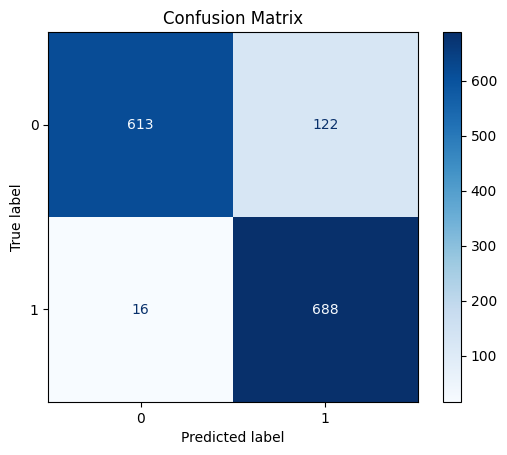

In [ ]:
y_pred_det = det_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_det)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=det_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
accuracy_det  = det_model.score(X_test, y_test)
f1_det = f1_score(y_test, y_pred_det, average='binary')
precision_det = precision_score(y_test, y_pred_det, average='binary')
recall_det = recall_score(y_test, y_pred_det, average='binary')

print("Precision: {:.2f}".format(precision_det))
print("Recall: {:.2f}".format(recall_det))
print("F1 Score: {:.2f}".format(f1_det))
print("Accuracy: {:.2f}".format(accuracy_det))

Precision: 0.85
Recall: 0.98
F1 Score: 0.91
Accuracy: 0.98


## Random Forest

### Parameters

1- n_estimators : number of trees in the forest

2- max_depth: Maximum depth of each tree

3-min_samples_split:  Minimum number of samples required to split an internal node

4- min_samples_leaf: Minimum number of samples required to be at a leaf node



### Implementation

In [ ]:
rf = RandomForestClassifier(random_state=42)


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
scoring = {
    'precision':'precision',
    'recall': 'recall',
    'f1':'f1',
    'accuracy':'accuracy'
}

In [ ]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scoring,refit='recall', verbose=1, n_jobs=-1,return_train_score=True)

In [ ]:
model_rf = grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
results_rf = model_rf.cv_results_
results_rf_df = pd.DataFrame(results_rf)

columns_of_interest =  ['params', 'mean_train_accuracy', 'mean_test_accuracy','mean_train_precision', 'mean_train_recall', 'mean_train_f1','mean_test_precision', 'mean_test_recall', 'mean_test_f1']
results_df_rf_col = results_rf_df[columns_of_interest]

results_df_rf_col

,params,mean_train_accuracy,mean_test_accuracy,mean_train_precision,mean_train_recall,mean_train_f1,mean_test_precision,mean_test_recall,mean_test_f1
0,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",1.000000,0.954111,1.000000,1.000000,1.000000,0.932306,0.979946,0.955506
1,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",1.000000,0.955154,1.000000,1.000000,1.000000,0.933557,0.980639,0.956493
2,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",1.000000,0.954632,1.000000,1.000000,1.000000,0.932672,0.980639,0.956018
3,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.998523,0.941769,0.999740,0.997320,0.998528,0.915527,0.974069,0.943871
4,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.998653,0.947506,1.000000,0.997320,0.998658,0.927427,0.971646,0.949011
...,...,...,...,...,...,...,...,...,...
103,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.981444,0.891883,0.981837,0.981241,0.981536,0.861707,0.934996,0.896838
104,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.982140,0.894142,0.982446,0.982019,0.982231,0.864158,0.936726,0.898944
105,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.977403,0.887363,0.974737,0.980464,0.977589,0.855312,0.933957,0.892890
106,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.979011,0.891361,0.977353,0.980982,0.979160,0.859948,0.936381,0.896516


In [ ]:
results_df_training_rf_col = results_rf_df[['params','mean_train_accuracy','mean_train_precision','mean_train_recall','mean_train_f1']]

results_df_training_rf_col

,params,mean_train_accuracy,mean_train_precision,mean_train_recall,mean_train_f1
0,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",1.000000,1.000000,1.000000,1.000000
1,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",1.000000,1.000000,1.000000,1.000000
2,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",1.000000,1.000000,1.000000,1.000000
3,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.998523,0.999740,0.997320,0.998528
4,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.998653,1.000000,0.997320,0.998658
...,...,...,...,...,...
103,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.981444,0.981837,0.981241,0.981536
104,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.982140,0.982446,0.982019,0.982231
105,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.977403,0.974737,0.980464,0.977589
106,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.979011,0.977353,0.980982,0.979160


In [ ]:
results_df_testing_rf_col = results_rf_df[['params','mean_test_accuracy','mean_test_precision','mean_test_recall','mean_test_f1']]

results_df_testing_rf_col

,params,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.954111,0.932306,0.979946,0.955506
1,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.955154,0.933557,0.980639,0.956493
2,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.954632,0.932672,0.980639,0.956018
3,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.941769,0.915527,0.974069,0.943871
4,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.947506,0.927427,0.971646,0.949011
...,...,...,...,...,...
103,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.891883,0.861707,0.934996,0.896838
104,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.894142,0.864158,0.936726,0.898944
105,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.887363,0.855312,0.933957,0.892890
106,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.891361,0.859948,0.936381,0.896516


In [ ]:
print("Best parameters:", model_rf.best_params_)
print("Best cross-validation score: {:.2f}".format(model_rf.best_score_))

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.98


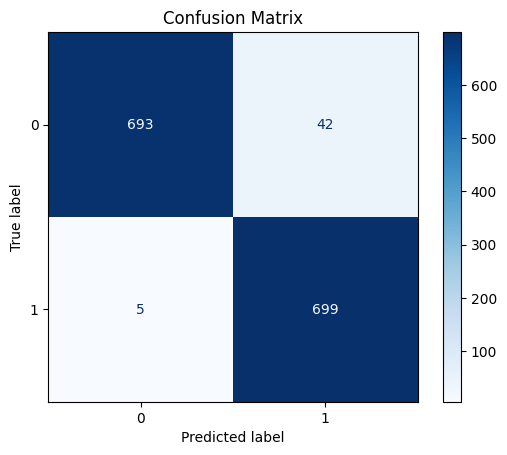

In [ ]:
y_pred_rf = model_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
f1_rf = f1_score(y_test, y_pred_rf, average='binary')
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
accuracy_rf  = model_rf.score(X_test, y_test)

print("Accuracy: {:.2f}".format(accuracy_rf))
print("Precision: {:.2f}".format(precision_rf))
print("Recall: {:.2f}".format(recall_rf))
print("F1 Score: {:.2f}".format(f1_rf))

Accuracy: 0.99
Precision: 0.94
Recall: 0.99
F1 Score: 0.97


## XGBoost

### Parameters

1- n_estimators: Number of boosting rounds or trees to build.

2- learning_rate: Step size shrinkage used to prevent overfitting. Each tree's contribution is scaled by this factor.

3- max_depth:  Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit

4- subsample: Subsample ratio of the training instances

5- colsample_bytree:  Subsample ratio of columns when constructing each tree.


### Implementation

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9]
}

In [ ]:
scoring = {
    'precision':'precision',
    'recall': 'recall',
    'f1':'f1',
    'accuracy':'accuracy'
}

In [ ]:
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5,refit='recall', scoring=scoring, verbose=1, n_jobs=-1,return_train_score=True)

In [ ]:
model_xgb = grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
results_xgb = model_xgb.cv_results_
results_xgb_df = pd.DataFrame(results_xgb)

columns_of_interest = ['params', 'mean_train_accuracy', 'mean_test_accuracy','mean_train_precision', 'mean_train_recall', 'mean_train_f1','mean_test_precision', 'mean_test_recall', 'mean_test_f1']
results_df_xgb_col = results_xgb_df[columns_of_interest]

results_df_xgb_col

,params,mean_train_accuracy,mean_test_accuracy,mean_train_precision,mean_train_recall,mean_train_f1,mean_test_precision,mean_test_recall,mean_test_f1
0,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.698201,0.685557,0.690969,0.723031,0.706595,0.679839,0.707816,0.693482
1,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.695725,0.685383,0.686747,0.725712,0.705640,0.677796,0.713004,0.694907
2,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.706067,0.696334,0.695575,0.738504,0.716384,0.686881,0.727530,0.706591
3,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.708674,0.692509,0.695973,0.746630,0.720397,0.681863,0.727873,0.704094
4,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.713889,0.699811,0.702914,0.746283,0.723946,0.689912,0.731680,0.710155
...,...,...,...,...,...,...,...,...,...
103,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.996741,0.912396,0.999219,0.994295,0.996750,0.874057,0.964733,0.917149
104,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",1.000000,0.933078,1.000000,1.000000,1.000000,0.894117,0.983752,0.936688
105,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.999957,0.930297,1.000000,0.999914,0.999957,0.891838,0.980292,0.933955
106,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",1.000000,0.934991,1.000000,1.000000,1.000000,0.897810,0.982714,0.938294


In [ ]:
results_df_training_xgb_col = results_xgb_df[['params','mean_train_accuracy','mean_train_precision','mean_train_recall','mean_train_f1']]

results_df_training_xgb_col

,params,mean_train_accuracy,mean_train_precision,mean_train_recall,mean_train_f1
0,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.698201,0.690969,0.723031,0.706595
1,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.695725,0.686747,0.725712,0.705640
2,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.706067,0.695575,0.738504,0.716384
3,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.708674,0.695973,0.746630,0.720397
4,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.713889,0.702914,0.746283,0.723946
...,...,...,...,...,...
103,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.996741,0.999219,0.994295,0.996750
104,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",1.000000,1.000000,1.000000,1.000000
105,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.999957,1.000000,0.999914,0.999957
106,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",1.000000,1.000000,1.000000,1.000000


In [ ]:
results_df_training_xgb_col = results_xgb_df[['params','mean_test_accuracy','mean_test_precision','mean_test_recall','mean_test_f1']]

results_df_training_xgb_col

,params,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.685557,0.679839,0.707816,0.693482
1,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.685383,0.677796,0.713004,0.694907
2,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.696334,0.686881,0.727530,0.706591
3,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.692509,0.681863,0.727873,0.704094
4,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.699811,0.689912,0.731680,0.710155
...,...,...,...,...,...
103,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.912396,0.874057,0.964733,0.917149
104,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.933078,0.894117,0.983752,0.936688
105,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.930297,0.891838,0.980292,0.933955
106,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.934991,0.897810,0.982714,0.938294


In [ ]:
print("Best parameters:", model_xgb.best_params_)
print("Best cross-validation score: {:.2f}".format(model_xgb.best_score_))

Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
Best cross-validation score: 0.98


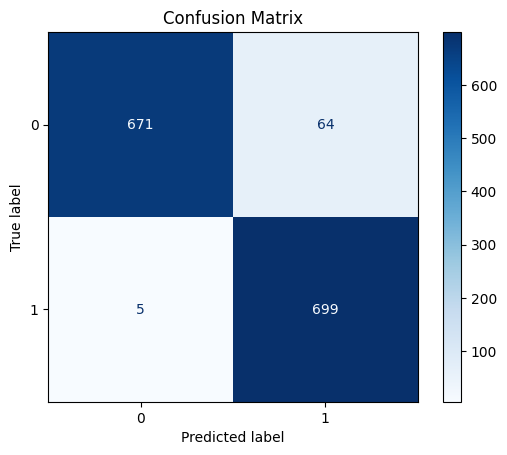

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)

cm = confusion_matrix(y_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_xgb  = model_xgb.score(X_test, y_test)
f1_xgb = f1_score(y_test, y_pred_xgb, average='binary')
precision_xgb = precision_score(y_test, y_pred_xgb, average='binary')
recall_xgb = recall_score(y_test, y_pred_xgb, average='binary')

print("Accuracy: {:.2f}".format(accuracy_xgb))
print("Precision: {:.2f}".format(precision_xgb))
print("Recall: {:.2f}".format(recall_xgb))
print("F1 Score: {:.2f}".format(f1_xgb))

Accuracy: 0.99
Precision: 0.92
Recall: 0.99
F1 Score: 0.95


## Ada Boost

### Parameters



1: n_estimators: The maximum number of estimators (weak learners) at which boosting is terminated. In the case of a perfect fit, the learning process is stopped early.

2- learning_rate : Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier.

3- algorithm:  Specifies whether to use the SAMME or SAMME.R algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

### Implementation

In [ ]:
ada = AdaBoostClassifier( random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}


In [ ]:
scoring = {
    'precision':'precision',
    'recall': 'recall',
    'f1':'f1',
    'accuracy':'accuracy'
}

In [ ]:
grid_search_ada = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring=scoring,refit='recall', verbose=1, n_jobs=-1,return_train_score=True)

In [ ]:
model_ada = grid_search_ada.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
results_ada = model_ada.cv_results_
results_ada_df = pd.DataFrame(results_ada)

columns_of_interest =  ['params', 'mean_train_accuracy', 'mean_test_accuracy','mean_train_precision', 'mean_train_recall', 'mean_train_f1','mean_test_precision', 'mean_test_recall', 'mean_test_f1']
results_df_ada_col = results_ada_df[columns_of_interest]

results_df_ada_col

,params,mean_train_accuracy,mean_test_accuracy,mean_train_precision,mean_train_recall,mean_train_f1,mean_test_precision,mean_test_recall,mean_test_f1
0,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.641318,0.638447,0.609413,0.799014,0.691329,0.607501,0.795642,0.688654
1,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.645837,0.644010,0.615265,0.789159,0.691365,0.614185,0.788036,0.690007
2,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.663698,0.661914,0.648227,0.728473,0.685197,0.645924,0.725806,0.683010
3,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.671128,0.665739,0.668262,0.687153,0.677435,0.662909,0.682232,0.672242
4,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.672041,0.668174,0.668290,0.691388,0.679308,0.663766,0.689846,0.676148
5,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.674605,0.671303,0.672189,0.688538,0.680247,0.669197,0.684648,0.676760
6,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.673606,0.670085,0.662083,0.716030,0.687894,0.659729,0.709893,0.683821
7,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.678994,0.670258,0.668304,0.717327,0.691912,0.660272,0.708509,0.683518
8,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.684427,0.674602,0.676767,0.712141,0.693899,0.668755,0.698482,0.683216
9,"{'algorithm': 'SAMME.R', 'learning_rate': 0.01...",0.645837,0.644010,0.615265,0.789159,0.691365,0.614185,0.788036,0.690007


In [ ]:
results_df_training_ada_col = results_ada_df[['params','mean_train_accuracy','mean_train_precision','mean_train_recall','mean_train_f1']]

results_df_training_ada_col

,params,mean_train_accuracy,mean_train_precision,mean_train_recall,mean_train_f1
0,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.641318,0.609413,0.799014,0.691329
1,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.645837,0.615265,0.789159,0.691365
2,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.663698,0.648227,0.728473,0.685197
3,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.671128,0.668262,0.687153,0.677435
4,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.672041,0.668290,0.691388,0.679308
5,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.674605,0.672189,0.688538,0.680247
6,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.673606,0.662083,0.716030,0.687894
7,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.678994,0.668304,0.717327,0.691912
8,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.684427,0.676767,0.712141,0.693899
9,"{'algorithm': 'SAMME.R', 'learning_rate': 0.01...",0.645837,0.615265,0.789159,0.691365


In [ ]:
results_df_testing_ada_col = results_ada_df[['params','mean_test_accuracy','mean_test_precision','mean_test_recall','mean_test_f1']]

results_df_testing_ada_col

,params,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.638447,0.607501,0.795642,0.688654
1,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.644010,0.614185,0.788036,0.690007
2,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.661914,0.645924,0.725806,0.683010
3,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.665739,0.662909,0.682232,0.672242
4,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.668174,0.663766,0.689846,0.676148
5,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.671303,0.669197,0.684648,0.676760
6,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.670085,0.659729,0.709893,0.683821
7,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.670258,0.660272,0.708509,0.683518
8,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.674602,0.668755,0.698482,0.683216
9,"{'algorithm': 'SAMME.R', 'learning_rate': 0.01...",0.644010,0.614185,0.788036,0.690007


In [ ]:
print("Best parameters:", model_ada.best_params_)
print("Best cross-validation score: {:.2f}".format(model_ada.best_score_))

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best cross-validation score: 0.80


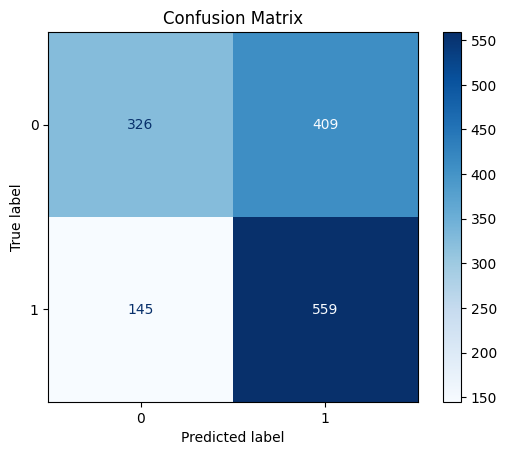

In [ ]:
y_pred_ada = model_ada.predict(X_test)

cm = confusion_matrix(y_test, y_pred_ada)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_ada.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_ada  = model_ada.score(X_test, y_test)
f1_ada = f1_score(y_test, y_pred_ada, average='binary')
precision_ada = precision_score(y_test, y_pred_ada, average='binary')
recall_ada = recall_score(y_test, y_pred_ada, average='binary')

print("Precision: {:.2f}".format(precision_ada))
print("Recall: {:.2f}".format(recall_ada))
print("F1 Score: {:.2f}".format(f1_ada))
print("Precision: {:.2f}".format(accuracy_ada))

Precision: 0.58
Recall: 0.79
F1 Score: 0.67
Precision: 0.79


# Comparing The models

I will rely on the recall at First because my study is a health care and I care about FN to be the least posible value

<Axes: >

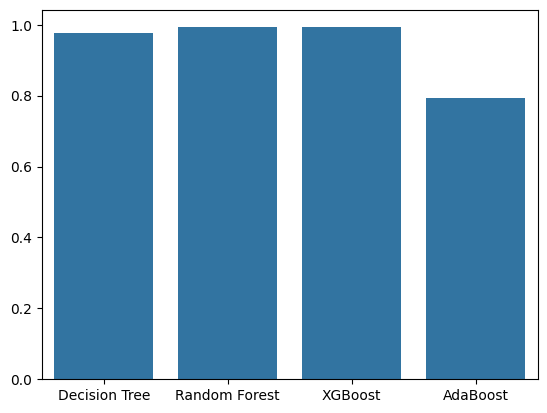

In [ ]:
sns.barplot(x=['Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost'], y=[recall_det, recall_rf, recall_xgb, recall_ada])

Then the Precision

<Axes: >

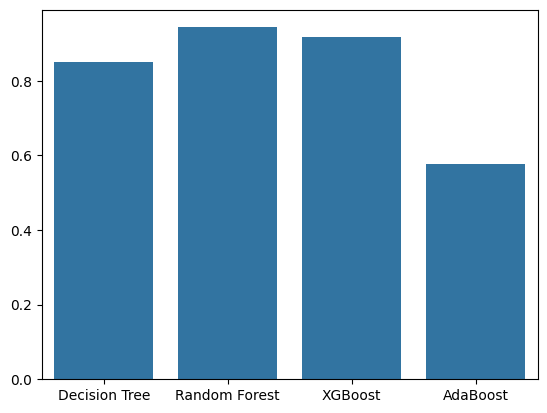

In [ ]:
sns.barplot(x=['Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost'], y=[precision_det, precision_rf, precision_xgb, precision_ada])

Then F1 Score

<Axes: >

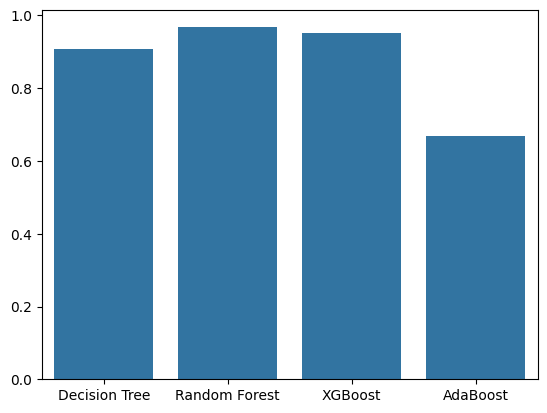

In [ ]:
sns.barplot(x=['Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost'], y=[f1_det, f1_rf, f1_xgb, f1_ada])